In [125]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider

'''
import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
from cartopy.util import add_cyclic_point
'''
#import contextily as ctx

'\nimport cartopy.crs as ccrs\nimport cartopy.mpl.ticker as cticker\nfrom cartopy.util import add_cyclic_point\n'

In [151]:
global month, longitudes, latitudes, coords

month = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
         'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

longitudes = np.arange(0,360,3.75)/3.75
#latitudes = np.arange(-90,92.5,2.5)
latitudes = np.arange(0,182.5,2.5)/2.5

long_mesh, lat_mesh = np.meshgrid(longitudes, latitudes)
coords = np.column_stack((long_mesh.ravel(), lat_mesh.ravel()))

def diffileconv(file):
    global month 
    var_line = []
    var = []
    weather = {}

    
    with open(file) as f:
        lines = f.readlines()

        for l in lines:
            if "7008" in l:
                pass
            else:
                ts = l.split(' ')
                ts = [t for t in ts if t != '']
                for item in ts:
                    try:
                        var.append(float(item))
                    except: 
                        break


    monthly_var = []

    for i in range(0, len(var), int(len(var)/len(month))):
        monthly_var.append(var[i : i + int(len(var)/len(month))])

    for i in range(0, 12):
        weather[month[i]] = monthly_var[i]

    df = pd.DataFrame(weather)
   # weather_var['Longitude'] = coords[:,0]
   # weather_var['Latitude'] = coords[:,1]

    mat = df.to_numpy().transpose().reshape(12,73,96)
    mat = np.roll(mat, 48, axis=2)

    return mat  


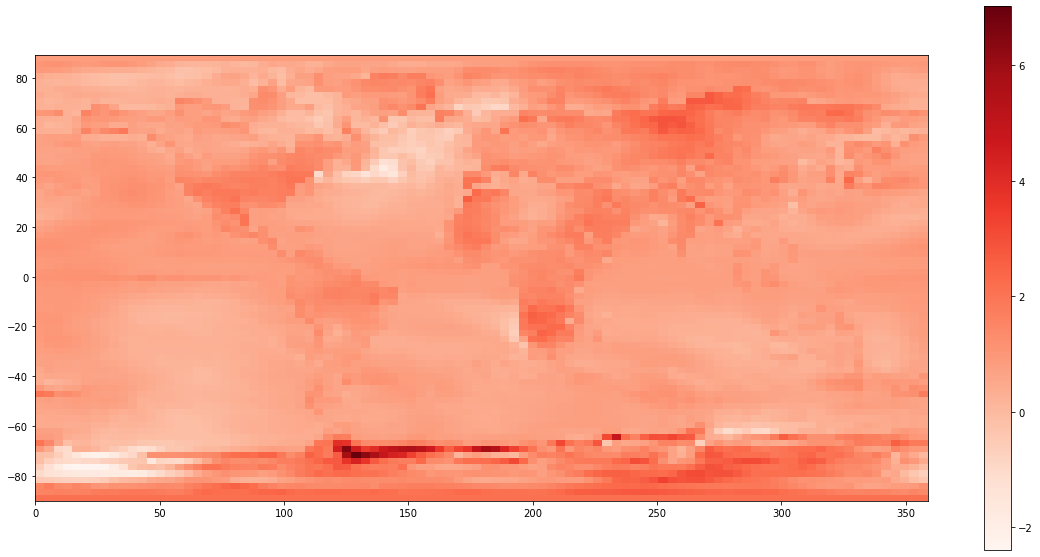

In [157]:
temps = diffileconv("weather-data\A2a\HADCM3_A2a_TEMP_2020.dif")

plt.figure(figsize = (20,10))
plt.imshow(temps[4], cmap = 'Reds', extent=[0, 359, -90, 89])
plt.colorbar()


#ax_slider = plt.axes([0.1, 0.1, 0.8, 0.05])
#slider = Slider(ax_slider, "Month", valmin = 0, valmax = 12, valinit = 0, valstep = 0)

In [72]:
long_mesh, lat_mesh = np.meshgrid(longitudes, latitudes)
coords = np.column_stack((long_mesh.ravel(), lat_mesh.ravel()))

In [ ]:
# Make the figure larger
fig = plt.figure(figsize=(11,8.5))

# Set the axes using the specified map projection
ax=plt.axes(projection=ccrs.PlateCarree())

# Make a filled contour plot
ax.contourf(ds['lon'], ds['lat'], ds_mean['tas'],
            transform = ccrs.PlateCarree())

# Add coastlines
ax.coastlines()

In [124]:
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df['Longitude'], df['Latitude']))

# Create the plot
fig, ax = plt.subplots(figsize=(20, 20))

# Plot the geographic data
gdf.plot(ax=ax, column='Jul', cmap='Reds')

# Add a tile map from an online tile map service (e.g., OpenStreetMap)
#ctx.add_basemap(ax, source=ctx.providers.OpenTopo)

# Add labels, title, etc. as desired
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('Heatmap Overlay on Base Map')

# Display the plot
plt.show()


KeyError: 'Longitude'